# Análisis de datos - Regresión Lineal
## Estimación de tendencia de clima en el transcurso de un día.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#sklearn es la biblioteca de recursos para tratamiento de datos
from sklearn.model_selection import train_test_split #divide dataset training y test
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [19]:
var_proc='tout'
txt_proc='Temp_Exterior, °C'

In [20]:
dataset = pd.read_csv('datcorr.csv')
dataset.columns = dataset.columns.str.lower() #convierte a minusculas
#dataset.columns #accede al nombre de las columnas
#dataset

In [21]:
#El resultado obtenido es de tipo frame
y= dataset.loc[:,[var_proc]].values#['cum_irr']]#
x= dataset.loc[:,['%time']].values#['co2_cons']]#
vartext_y=txt_proc#'Irrigación'#
vartext_x='Tiempo'#'Suministro'#

In [22]:
dia=10 #Día inicial para análisis
num_dias=30 #numero de dias analisis
m_dia=int(1*24*60/5) #Número de muestras diarias
m_num_dias=m_dia*num_dias #total de muestras para aprendizaje
offset=int((dia-1)*m_dia) #Posición de la muestra inicial en el conjunto
xa=x[offset:offset+m_num_dias] #Extracción de conjunto de datos para análisis
ya=y[offset:offset+m_num_dias]
#x_train, x_test, y_train, y_test = train_test_split(xa,ya,test_size=0.3)
x_train=xa
y_train=ya

diatest=dia+num_dias #Día para análisis
num_diastest=int(num_dias/3) #numero de dias analisis
m_num_diastest=m_dia*num_diastest #total de muestras para aprendizaje
offset=int((diatest-1)*m_dia) #Desplazamiento para inicio de día
x_test=x[offset:offset+m_num_diastest]
y_test=y[offset:offset+m_num_diastest]
#0.3 o 30% de datos para testeo

In [23]:
regressor =LinearRegression()
regressor.fit(x_train, y_train) # Modelo lineal de los datos proporcionados
y_pred=regressor.predict(x_test) #el modelo predice el resultado de los datos de prueba

## Gradiente descendente estocástico

In [24]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=2000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x_train, y_train.ravel())
y_pred2=sgd_reg.predict(x_test) #el modelo predice el resultado de los datos de prueba

## SVM Lineal

In [25]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=0,max_iter=10000)

In [26]:
svm_reg.fit(x_train, y_train.ravel()) # Modelo lineal de los datos proporcionados
y_pred3=svm_reg.predict(x_test) #el modelo predice el resultado de los datos de prueba

c:\Users\SENA\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Regresión Bayesiana

In [27]:
from sklearn import linear_model
bay_reg = linear_model.BayesianRidge()
bay_reg.fit(x_train, y_train.ravel())
y_pred4=bay_reg.predict(x_test)

## Regresión polinomial

In [28]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="RBF", degree=3, C=1, epsilon=0.1)
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [29]:
svr_lin.fit(x_train, y_train.ravel())
#svr_poly.fit(x_train, y_train.ravel())
#svr_lin.fit(x_train, y_train.ravel())
#svm_poly_reg.fit(x_train, y_train.ravel())
y_pred5=svr_lin.predict(x_test)

## Visualización

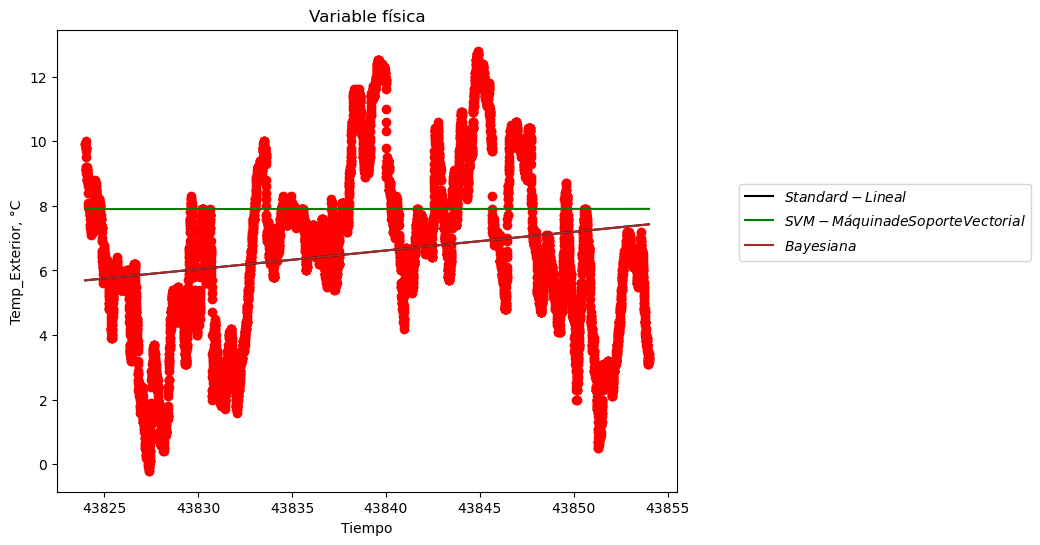

In [30]:
#m_dia=int(24*60/50)
#xa=x[0:m_dia]
plt.figure(figsize=(8,6))
#plt.plot(xa, sgd_reg.predict(xa),color='blue',label="$Gradiente Descendente$")
plt.plot(xa, regressor.predict(xa),color='black',label="$Standard - Lineal$")
plt.plot(xa, svm_reg.predict(xa),color='green',label="$SVM - Máquina de Soporte Vectorial$")
plt.plot(xa, bay_reg.predict(xa),color='brown',label="$Bayesiana$")
#plt.plot(xa, svr_lin.predict(xa),color='yellow',label='$SVR - Vector de Soporte epsilon$')
#plt.plot(xa, svr_poly.predict(xa),color='blue')
#plt.plot(xa, svr_lin.predict(xa),color='yellow')
plt.scatter(xa,ya,color='red')
plt.title('Variable física')
plt.xlabel(vartext_x)
plt.ylabel(vartext_y)
plt.legend(loc=(1.1, 0.5))
plt.show()

In [31]:
coef=[['',0,0,0,0,0],['',0,0,0,0,0],['',0,0,0,0,0],['',0,0,0,0,0],['',0,0,0,0,0]] #pendiente intercepto error_medio_absoluto  r2_score

In [32]:
coef[0] = 'Lineal',regressor.coef_[0], regressor.intercept_, mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred), r2_score(y_test,y_pred)
coef[1] = 'SGD',sgd_reg.coef_ , sgd_reg.intercept_ , mean_squared_error(y_test,y_pred2), mean_absolute_error(y_test,y_pred2), r2_score(y_test,y_pred2)
coef[2] = 'SVM',svm_reg.coef_ , svm_reg.intercept_ , mean_squared_error(y_test,y_pred3), mean_absolute_error(y_test,y_pred3), r2_score(y_test,y_pred3)
coef[3] = 'BAY',bay_reg.coef_ , bay_reg.intercept_ , mean_squared_error(y_test,y_pred4), mean_absolute_error(y_test,y_pred4), r2_score(y_test,y_pred4)
coef[4] = 'RBF',0 , 0, mean_squared_error(y_test,y_pred5), mean_absolute_error(y_test,y_pred5), r2_score(y_test,y_pred5)

In [33]:
v_coef=pd.DataFrame(coef, columns =['reg','coef','interc','mean squared','mean_absolute','r2'])

In [34]:
v_coef

,reg,coef,interc,mean squared,mean_absolute,r2
0,Lineal,[0.057877559287340966],[-2530.7345046806604],7.936921e+00,2.327571e+00,3.938319e-02
1,SGD,[1690410730499.8438],[652847442.9848099],5.496698e+33,7.413972e+16,-6.652732e+32
2,SVM,[0.00018024334395579195],[-4.439377242583801e-06],8.949254e+00,2.448182e+00,-8.314085e-02
3,BAY,[0.057690553314014],-2522.53635,7.934425e+00,2.327375e+00,3.968528e-02
4,RBF,0,0,2.544116e+08,1.595001e+04,-3.079180e+07


In [35]:
mean_squared_error(y_test, y_pred5)

254411626.88100505